# STA365 HW2
## Lisa Wang

### Q1
**Question:** 

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

**Answer:** 

\begin{align*}
\text{Binomial Likelihood:} && P(x \mid \theta, n) &= \binom{n}{x} \theta^x (1-\theta)^{n-x}, \quad x = 0, 1, 2, \dots, n \\\\
\text{Uniform Prior:} && P(\theta) &= \frac{1}{101}, \quad \text{for } \theta = \frac{i}{100}, \quad i = 0, 1, 2, \dots, 100 \\\\
\text{Deriving the posterior distribution:} && P(\theta \mid x, n) &= \frac{P(x \mid \theta) P(\theta)}{P(x)} \\\\
&&&= \binom{n}{x} \theta^x (1-\theta)^{n-x} \cdot \frac{1}{101} \\\\
&&&\propto \theta^x (1-\theta)^{n-x} \\\\
\text{Posterior Distribution:} && \theta \mid x, n &\sim \text{Beta}(x+1, n-x+1), \quad \text{where } \theta = \left\{ 0, \frac{1}{100}, \dots, 1 \right\}
\end{align*}


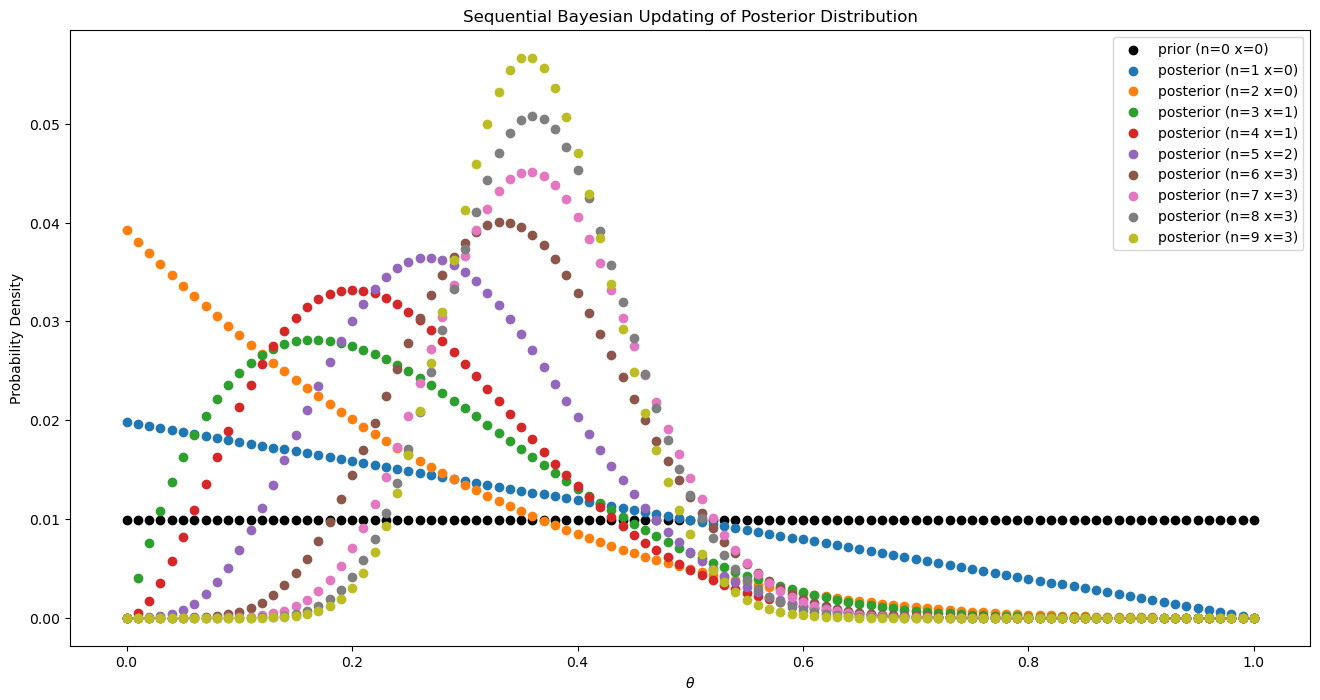

In [17]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0 # n = 9
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')

for observation in observations:
    n += 1
    x += observation
    
    # Compute Binomial likelihood for each theta in the grid
    likelihood = parameter_domain**x * (1-parameter_domain)**(n-x)

    # Compute posterior 
    posterior = likelihood * prior

    # Normalize posterior (sum to 1)
    posterior /= np.sum(posterior)
    
    prior = posterior  # for each Bernoulli observation update
    
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.title("Sequential Bayesian Updating of Posterior Distribution")
plt.xlabel(r"$\theta$")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

### Q2
**Question:** 

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

***Answer:***

1.

\begin{align*}
\text{Posterior distribution:} && \theta_j^{(t)} \mid x_j^{(t)}, n_j^{(t)} &\sim \text{Beta}(\alpha_j + x_j^{(t)}, \beta_j + n_j^{(t)} - x_j^{(t)})
\end{align*}

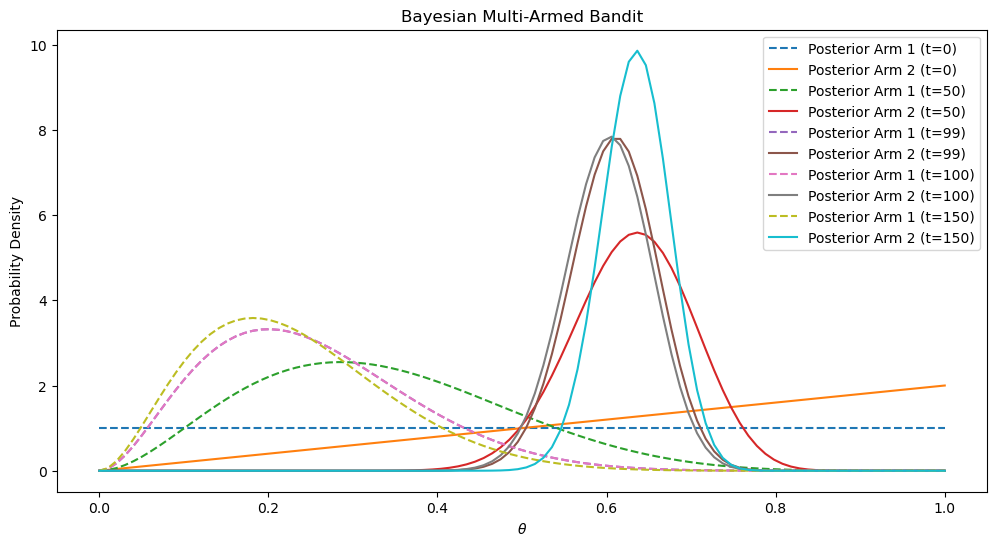

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Set true probabilities for the two arms
theta1_true = 0.3  # arm 1
theta2_true = 0.6  # arm 2

# Set priors
alpha1, beta1 = 1, 1
alpha2, beta2 = 1, 1

# Track the number of successes (x) & trials (n)
n1, x1 = 0, 0  # Arm 1
n2, x2 = 0, 0  # Arm 2

# Set m = 200
m = 200
history = []

plt.figure(figsize=(12, 6))

# Run the multi-armed bandit for m (=200) rounds
for t in range(m):
    # Sample theta values from Beta posteriors
    sampled_theta1 = beta.rvs(alpha1, beta1)
    sampled_theta2 = beta.rvs(alpha2, beta2)
    
    # Select the arm with the highest sampled probability
    if sampled_theta1 > sampled_theta2:
        chosen_arm = 1
        success = np.random.rand() < theta1_true  # Flip coin using true probability
        n1 += 1  # update trials
        x1 += success  # update successes 
        alpha1 += success
        beta1 += 1 - success
    else:
        chosen_arm = 2
        success = np.random.rand() < theta2_true  
        n2 += 1  # 
        x2 += success  
        alpha2 += success
        beta2 += 1 - success

    # Save history (later for visualization)
    history.append((t, chosen_arm, sampled_theta1, sampled_theta2))

    # Plot posterior distributions every 50 iterations (show learning proccess)
    if t % 50 == 0 or t == num_trials - 1:
        theta_grid = np.linspace(0, 1, 100)
        plt.plot(theta_grid, beta.pdf(theta_grid, alpha1, beta1), label=f"Posterior Arm 1 (t={t})", linestyle="dashed")
        plt.plot(theta_grid, beta.pdf(theta_grid, alpha2, beta2), label=f"Posterior Arm 2 (t={t})")

# Final plot formatting
plt.xlabel(r"$\theta$")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Bayesian Multi-Armed Bandit")
plt.show('png')

### Q3
**Question:** 

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

***Answer:***

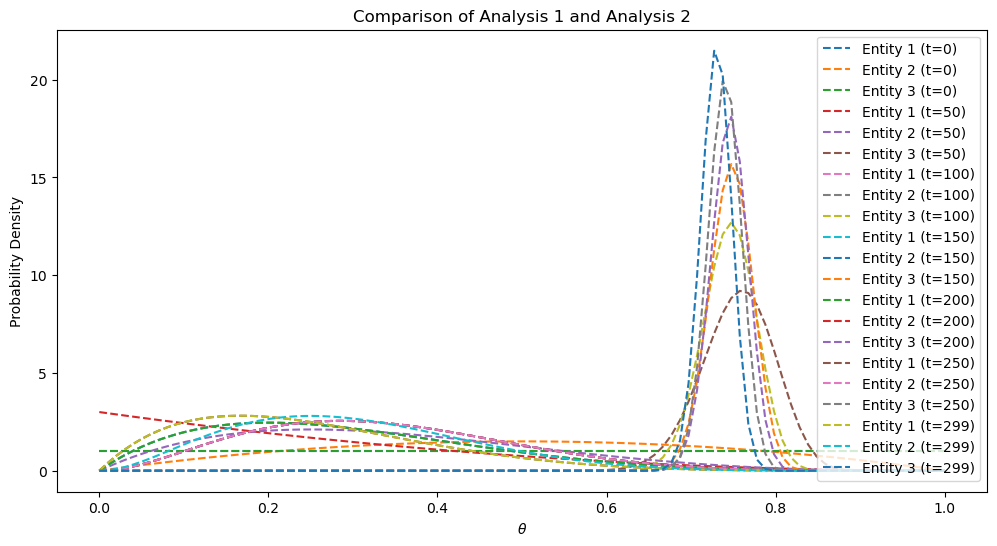

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# True success probabilities for the three entities
theta_true = np.array([0.2, 0.5, 0.7])

# Priors for Beta-Binomial (Analysis 1)
alpha_beta = np.ones(3)  
beta_beta = np.ones(3)   

# Prior for Dirichlet-Multinomial (Analysis 2)
alpha_dirichlet = np.ones(3)  # Prior (Dirichlet(1,1,1))

# Number of trials per step
num_trials = 100
num_rounds = 300
history_beta = []
history_dirichlet = []

# Track success and trial counts
success_counts = np.zeros(3)
trial_counts = np.zeros(3)

plt.figure(figsize=(12, 6))

for t in range(num_rounds):
    # Sample from Beta posteriors (Analysis 1)
    sampled_thetas_beta = beta.rvs(alpha_beta + success_counts, beta_beta + trial_counts - success_counts)
    
    # Sample from Dirichlet posterior (Analysis 2)
    sampled_thetas_dirichlet = dirichlet.rvs(alpha_dirichlet + success_counts)[0]

    # Select the best arm 
    chosen_entity_beta = np.argmax(sampled_thetas_beta)
    chosen_entity_dirichlet = np.argmax(sampled_thetas_dirichlet)

    # Simulate trial outcomes based on true probabilities
    success_beta = np.random.rand() < theta_true[chosen_entity_beta]
    success_dirichlet = np.random.rand() < theta_true[chosen_entity_dirichlet]

    # Update counts
    success_counts[chosen_entity_beta] += success_beta
    trial_counts[chosen_entity_beta] += 1

    success_counts[chosen_entity_dirichlet] += success_dirichlet
    trial_counts[chosen_entity_dirichlet] += 1

    # Store history (for visualization)
    history_beta.append(sampled_thetas_beta)
    history_dirichlet.append(sampled_thetas_dirichlet)

    # Plot posterior distributions every 50 rounds (show learning proccess)
    if t % 50 == 0 or t == num_rounds - 1:
        theta_grid = np.linspace(0, 1, 100)
        plt.plot(theta_grid, beta.pdf(theta_grid, alpha_beta[0] + success_counts[0], beta_beta[0] + trial_counts[0] - success_counts[0]), linestyle="dashed", label=f"Entity 1 (t={t})")
        plt.plot(theta_grid, beta.pdf(theta_grid, alpha_beta[1] + success_counts[1], beta_beta[1] + trial_counts[1] - success_counts[1]), linestyle="dashed", label=f"Entity 2 (t={t})")
        plt.plot(theta_grid, beta.pdf(theta_grid, alpha_beta[2] + success_counts[2], beta_beta[2] + trial_counts[2] - success_counts[2]), linestyle="dashed", label=f"Entity 3 (t={t})")

plt.xlabel(r"$\theta$")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Comparison of Analysis 1 and Analysis 2")
plt.show('png')

When comparing the Beta-Binomial model and the Dirichlet-Multinomial model, the choice depends on whether the entities being analyzed share a common structure or not.

The Beta-Binomial model is more suitable when the entities are truly independent and do not share any underlying structure. On the other hand, the Dirichlet-Multinomial model is more appropriate when the entities share information or exhibit some correlation. 

A practical application of these models can be found in medical trials testing multiple treatments (e.g. treatments A, B, and C). If the treatments are designed for different patient groups with no overlap in effectiveness, the Beta-Binomial model would be the best choice, as it treats each treatment as an independent entity. However, if the treatments are expected to have shared biological effects, meaning that knowledge gained about one treatment could inform our understanding of another, the Dirichlet-Multinomial model would be more appropriate.